# 신경망의 수학적 구성 요소

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**케라스에서 MNIST 데이터셋 적재하기**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 구조**

Dense 층
- 모든 입력 뉴런과 출력 뉴런 사이에 연결된 완전히 연결된(fully connected) 층을 의미
- 각 입력 뉴런과 출력 뉴런 사이의 연결 가중치를 학습하고, 입력 신호에 가중치를 곱한 후 편향(bias)을 더하는 선형 변환(linear transformation)을 수행하고 이 선형 변환의 결과에 활성화 함수(activation function)를 적용하여 출력을 계산
- 예를 들어, Dense 층은 입력 벡터 [x₁, x₂, ..., xₙ]과 가중치 행렬 W, 편향 벡터 b가 주어졌을 때, 출력 벡터 [y₁, y₂, ..., yₘ]를 계산

활성화 함수(Activation function)

- 인공 신경망에서 각 뉴런의 출력을 결정하는 비선형 함수
- 활성화 함수는 입력 신호의 가중치 합과 편향을 적용한 후, 그 결과에 적용되어 다음 층으로 전달
- 인공 신경망에서 비선형성을 도입하고, 신경망의 복잡한 함수 근사(approximation) 능력을 향상시키는 것
- 인공 신경망은 여러 층의 연속된 선형 변환과 비선형 활성화 함수를 조합하여 복잡한 입력과 출력 관계를 학습
- 주요 활성화 함수
  - 시그모이드(Sigmoid) 함수:
    - 범위: 0과 1 사이
    - 주요 특징: 입력값을 확률로 해석할 수 있으며, 비선형 함수로서 미분 가능
    - 단점: 큰 입력값에 대해 그래디언트 소실 문제가 발생할 수 있음
  - 하이퍼볼릭 탄젠트(Tanh) 함수:
    - 범위: -1과 1 사이
    - 주요 특징: 시그모이드와 유사하게 비선형 함수이며, 원점을 중심으로 대칭
    - 단점: 여전히 큰 입력값에 대해 그래디언트 소실 문제가 발생할 수 있음
  - 렐루(ReLU, Rectified Linear Unit) 함수:
    - 범위: 0 이상의 입력에 대해 그대로 출력, 음수 입력에 대해 0 출력
    - 주요 특징: 계산이 간단하고 빠르며, 선형 영역으로 쉽게 학습 가능
    - 단점: 음수 입력에 대해 출력이 0이 되어 해당 뉴런이 활성화되지 않는 문제가 있음 (죽은 렐루 문제)
  - 소프트맥스(Softmax) 함수:
    - 범위: 0과 1 사이
    - 주요 특징: 다중 클래스 분류에 사용되며, 출력값을 확률 분포로 해석
    - 단점: 출력값의 합이 1이 되도록 정규화되어, 다른 출력값에 영향을 받을 수 있음

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"), # 첫 번째 인자인 512는 출력 뉴런의 수
    layers.Dense(10, activation="softmax") # 출력을 확률로 해석하기 위해 소프트맥스(softmax) 활성화 함수
])

**컴파일 단계**

In [8]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 준비하기**

In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
# 0 ~ 1 사이로 스케일 조정
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
train_images[0]

**모델 훈련**

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2623 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1063 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0697 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0500 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0377 - accuracy: 0.9884


**모델을 사용해 예측 만들기**

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 86ms/step


array([1.3206495e-07, 4.5102135e-09, 3.4506855e-05, 4.0997117e-04,
       1.3943569e-11, 4.1105417e-07, 1.8206725e-12, 9.9955326e-01,
       7.4357061e-08, 1.6423317e-06], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.99955326

In [15]:
test_labels[0]

7

**새로운 데이터에서 모델 평가하기**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9778
테스트 정확도: 0.9778000116348267


## 신경망을 위한 데이터 표현

### 스칼라 (랭크-0 텐서)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### 벡터 (랭크-1 텐서)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### 행렬 (랭크-2 텐서)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [ ]:
x.shape

(4, 3, 5)

### 핵심 속성

In [18]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[4][0,0]

0

In [ ]:
train_images[4][14,14]

253

In [ ]:
train_images[4][0,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
# uint8은 8개의 비트로 256개의 서로 다른 값을 표현.
# 이미지 처리에서 많이 사용되는 데이터 형식 중 하나이며, 메모리 관리가 효율적이고 연산에도 효과적
train_images.dtype

dtype('uint8')

In [ ]:
train_images[4]

**다섯 번째 이미지 출력하기**

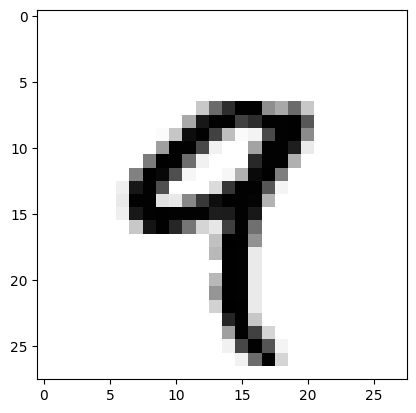

In [19]:
# MNIST 데이터셋의 픽셀 값은 그레이스케일 값으로, 0은 흰색을 의미하고 255는 검은색을 의미
# 특정 시각화 라이브러리나 플랫폼에 따라서 0과 255의 색상 표현이 반대로 설정될 수 있으며 일부 라이브러리는 0을 검은색으로, 255를 흰색으로 표현
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [20]:
digit[0,0]

0

In [ ]:
train_labels[4]

9

### 넘파이로 텐서 조작하기

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
# 정중앙에 위치한 14X14 픽셀 조각
my_slice = train_images[:, 7:-7, 7:-7]

### 배치 데이터

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### 텐서의 실제 사례

### 벡터 데이터

### 시계열 데이터 또는 시퀀스 데이터

### 이미지 데이터
- 3차원 이미지의 차원은 "가로 픽셀 수 x 세로 픽셀 수 x 이미지 슬라이스 수"로 표현
- 픽셀은 이미지를 구성하는 가장 작은 단위로, "picture element"의 줄임말이며 이미지를 표현하는 데 사용되는 점 또는 화소
- 흑백 이미지의 경우, 각 픽셀은 단일 색상 값을 가지며, 일반적으로 0부터 255까지의 범위로 표현. 0은 픽셀이 검은색에 가깝고, 255는 픽셀이 흰색에 가깝다.
- 컬러 이미지의 경우, 각 픽셀은 일반적으로 RGB(Red, Green, Blue) 값을 가지며 각각 빨강, 초록, 파랑의 강도를 나타내며, 0부터 255까지의 범위로 표현
- 강도의 조합에 따라 다양한 색상이 생성. 예를 들어, (255, 0, 0)은 빨간색, (0, 255, 0)은 초록색, (0, 0, 255)는 파란색
- 각 픽셀은 이미지의 위치에 따라 좌표로 식별. 가장 왼쪽 위 픽셀이 (0, 0)이며, 가로 방향으로 증가하면서 픽셀의 열 인덱스가 증가하고, 세로 방향으로 증가하면서 픽셀의 행 인덱스가 증가
- 이미지 처리 작업에서는 픽셀 단위의 조작이 중요하며, 픽셀 값을 수정하거나 분석하여 다양한 이미지 효과를 생성하거나 이미지에서 정보를 추출

### 비디오 데이터

## 신경망의 톱니바퀴: 텐서 연산

### 원소별 연산

In [ ]:
#  ReLU(Rectified Linear Unit) 함수를 구현
# x의 차원이 2가 아닐 경우 AssertionError를 발생시킵니다. 이는 프로그램 실행 중에 오류가 있음을 나타내며, 코드 실행이 중단
def naive_relu(x):
    assert len(x.shape) == 2 #  x의 차원이 2인지 확인
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
# 넘파이 내장함수 원소별 연산 속도
import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.87 s


### 브로드캐스팅

In [21]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [22]:
y = np.expand_dims(y, axis=0)

In [23]:
y

array([[0.37185826, 0.50941208, 0.76810039, 0.29172175, 0.66257775,
        0.45241837, 0.51031667, 0.05677455, 0.65730748, 0.11421566]])

In [24]:
Y = np.concatenate([y] * 32, axis=0)

In [25]:
Y[:2]

array([[0.37185826, 0.50941208, 0.76810039, 0.29172175, 0.66257775,
        0.45241837, 0.51031667, 0.05677455, 0.65730748, 0.11421566],
       [0.37185826, 0.50941208, 0.76810039, 0.29172175, 0.66257775,
        0.45241837, 0.51031667, 0.05677455, 0.65730748, 0.11421566]])

In [26]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 # x의 차원이 2인지 확인
    assert len(y.shape) == 1 # y의 차원이 1인지 확인
    assert x.shape[1] == y.shape[0] # x의 두 번째 차원의 길이가 y의 첫 번째(그리고 유일한) 차원의 길이와 같은지 확인
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j] # x의 i번째 행, j번째 열의 원소와 y의 j번째 원소를 더하고, 그 결과를 x의 해당 위치에 저장
    return x

In [27]:
# 덧셈
x = np.arange(10).reshape(2,5)
print(x)
y = np.arange(5)
print(y)
naive_add_matrix_and_vector(x,y)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4]


array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [ ]:
z

### 텐서 곱셈

In [28]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
print(x.shape,y.shape)
z

(32,) (32,)


8.144211162718271

In [29]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [30]:
naive_vector_dot(x, y)

8.14421116271827

In [31]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [32]:
x = np.arange(6).reshape(2,3)
y = np.arange(3)
naive_matrix_vector_dot(x, y)

array([ 5., 14.])

In [33]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [34]:
x = np.arange(6).reshape(2,3)
y = np.arange(6).reshape(3,2)
naive_matrix_dot(x, y)

array([[10., 13.],
       [28., 40.]])

### 텐서 크기 변환

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### 텐서 연산의 기하학적 해석

### 딥러닝의 기하학적 해석

## 신경망의 엔진: 그레이디언트 기반 최적화

### 도함수란?

### 텐서 연산의 도함수: 그레이디언트

### 확률적 경사 하강법

### 도함수 연결: 역전파 알고리즘

#### 연쇄 법칙

#### 계산 그래프를 활용한 자동 미분

#### 텐서플로의 그레이디언트 테이프

In [35]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [36]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

#### TensorFlow를 사용하여 변수 x에 대한 식 y = 2 * x + 3의 그래디언트(기울기)를 계산하고 tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 x의 값을 조정할 때 y가 어떻게 변화하는지를 알 수 있으며, 이는 모델의 최적화와 역전파 알고리즘에서 매우 유용.
- TensorFlow 변수 x를 생성합니다. tf.zeros((2, 2))를 사용하여 크기가 2x2이고 모든 요소가 0인 행렬로 초기화
- tf.GradientTape()를 사용하여 GradientTape 컨텍스트를 생성하고 tape를 사용하여 연산을 기록
- y = 2 * x + 3의 연산을 수행하고 결과를 변수 y에 저장. 이 때, TensorFlow의 브로드캐스팅(broadcasting) 기능을 사용하여 x의 각 요소에 2를 곱하고 3을 더함.
- tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 y를 x에 대해 미분한 결과, 즉 y에 대한 x의 기울기를 구한다. tape.gradient()의 첫 번째 인자로는 그래디언트를 계산하고자 하는 결과값(y)을 전달하고, 두 번째 인자로는 그래디언트를 계산하고자 하는 변수(x)를 전달.
- grad_of_y_wrt_x에는 y에 대한 x의 그래디언트가 저장된다.

In [ ]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [ ]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.3230883, 0.3230883],
        [0.7502687, 0.7502687]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## 첫 번째 예제 다시 살펴보기

#### 옵티마이저
- 모델의 학습 과정을 통제하고, 모델의 성능을 개선하는 역할
- 손실 함수 (또는 비용 함수)를 최소화하는 파라미터를 찾는 과정이며, 이 과정은 최적화 (Optimization)라고 함
- 옵티마이저
  - 확률적 경사 하강법 (SGD): 가장 기본적인 옵티마이저로, 각 훈련 단계에서 하나의 데이터 포인트 (또는 작은 배치)에 대한 그래디언트를 계산하여 모델 파라미터를 업데이트
  - 모멘텀: 경사 하강법에 '관성' 개념을 추가하여, 최적화 과정이 수렴을 가속화하고 지역 최솟값에서 벗어나는 데 도움
  - AdaGrad: 학습률이 각 파라미터에 따라 다르게 적용되는 적응형 학습률을 사용합니다. 이는 자주 등장하지 않는 피처에 높은 학습률을 할당하는 데 도움
  - RMSProp: AdaGrad의 문제점인 학습률이 너무 빨리 감소하는 문제를 해결한 방법
  - Adam (Adaptive Moment Estimation): 모멘텀과 RMSProp의 아이디어를 결합한 옵티마이저로, 적응형 학습률과 관성 개념을 모두 사용

#### 손실 함수 (Loss Function)
- 머신러닝 모델의 예측 출력이 실제 값과 얼마나 잘 일치하는지를 측정하는 방법
- 실 함수는 모델의 성능을 수치화하며, 이를 통해 모델의 파라미터를 최적화하는 데 사용
- 유형
  - 평균 제곱 오차 (Mean Squared Error, MSE): 회귀 문제에서 가장 일반적으로 사용되는 손실 함수. 실제 값과 모델의 예측 값 사이의 차이를 제곱한 값의 평균을 계산
  - 크로스 엔트로피 (Cross-Entropy): 분류 문제에서 일반적으로 사용되는 손실 함수. 모델의 예측 확률 분포와 실제 값의 분포 사이의 차이를 측정
  - sparse_categorical_crossentropy는 크로스 엔트로피 손실 함수의 한 형태로, 다중 클래스 분류 문제에서 주로 사용
  - 힌지 손실 (Hinge Loss): 서포트 벡터 머신 (SVM)과 같은 알고리즘에서 사용
  - 로그 손실 (Log Loss): 이진 분류 문제에서 사용되며, 예측 확률을 직접적으로 반영

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2595 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1051 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0701 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0506 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0380 - accuracy: 0.9884


### 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

@property
- 파이썬의 데코레이터(decorator) 중 하나로, 클래스의 메서드를 속성(property)처럼 사용할 수 있도록 해주는 기능
- @property는 클래스의 인터페이스를 단순화하고 읽기 및 쓰기 속성을 통합하는 데 유용
- 클래스의 내부 구현을 숨기고 사용자가 더 직관적이고 편리한 방식으로 클래스의 속성을 사용

In [ ]:
# TensorFlow를 사용하여 단순한 밀집(Dense) 계층을 구현한 NaiveDense 클래스
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        # W는 input_size와 output_size에 맞는 크기로 난수로 초기화
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        # b는 0으로 초기화
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs): # __call__: 클래스 객체를 함수처럼 호출할 수 있도록 해주는 메서드
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self): # weights를 호출하면 [self.W, self.b]로 구성된 리스트가 반환
        return [self.W, self.b]

#### 단순한 Sequential 클래스

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### 배치 제너레이터

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size) #  주어진 이미지 리스트를 특정 배치 크기로 나누었을 때 필요한 전체 배치의 수를 계산

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 훈련 스텝 실행하기

#### 가중치 vs 그래디언트
가중치는 신경망의 출력을 결정하는 파라미터이며, 그래디언트는 이러한 가중치를 어떻게 조정할지를 결정하는 방향성을 제공하는 지표
- 가중치는 각 입력 특성이 출력에 미치는 영향의 정도를 나타냅니다. 가중치는 학습 과정에서 최적화되며, 초기에는 일반적으로 임의의 값으로 설정되고, 학습 데이터를 통해 그래디언트를 계산하고 가중치를 업데이트함으로써 점진적으로 개선
- 그래디언트(Gradient): 그래디언트는 가중치가 변할 때 손실 함수가 어떻게 변하는지를 나타내는 지표. 그래디언트는 손실 함수의 편미분으로 계산되며, 이는 각 가중치에 대한 손실의 변화율을 나타낸다. 그래디언트는 가중치를 어떻게 업데이트할지를 결정하는데 사용되며, 손실을 줄이는 방향으로 가중치를 조정하는데 도움이 되며 그래디언트가 0인 경우, 해당 가중치는 손실에 미치는 영향이 없거나, 손실을 최소화하는 최적의 값에 도달했음을 의미

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape: #  자동 미분 도구로, 이를 이용해 모델의 예측과 손실을 계산하면서 그래디언트를 기록
        predictions = model(images_batch) # 신경망 모델에 이미지 배치를 입력으로 넣어서 예측을 수행
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions) # 각 샘플에 대한 손실을 계산
        average_loss = tf.reduce_mean(per_sample_losses) # 각 샘플의 손실을 평균내어 배치의 평균 손실을 계산
    gradients = tape.gradient(average_loss, model.weights) # 평균 손실에 기초하여 모델의 가중치에 대한 그래디언트를 계산
    update_weights(gradients, model.weights) # 계산된 그래디언트를 이용해 모델의 가중치를 업데이트
    return average_loss

In [ ]:
learning_rate = 1e-3 # 0.001

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate) # 현재 가중치(w)에서 그래디언트(g)와 학습률(learning_rate)를 곱한 값을 뺀 결과를 다시 w에 할당. 이는 경사 하강법의 한 단계를 수행하는 것

In [ ]:
# 가중치 업데이트 - 케라스의 Optimizer 인스턴스 사용
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [ ]:
# 주어진 에포크 수와 배치 크기에 따라 모델을 학습시키며, 각 배치에서의 손실을 출력하는 역할을 수행
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs): # 이미지 데이터와 레이블 데이터를 받아 배치 생성기를 생성
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next() # 배치 생성기로부터 다음 배치의 이미지와 레이블을 가져온다.
            loss = one_training_step(model, images_batch, labels_batch) # 현재 배치의 이미지와 레이블을 이용해 모델을 한 단계 학습
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}") # 현재 배치 번호와 해당 배치에서 계산된 손실을 출력

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 7.43
100번째 배치 손실: 2.22
200번째 배치 손실: 2.18
300번째 배치 손실: 2.06
400번째 배치 손실: 2.21
에포크 1
0번째 배치 손실: 1.87
100번째 배치 손실: 1.86
200번째 배치 손실: 1.80
300번째 배치 손실: 1.69
400번째 배치 손실: 1.82
에포크 2
0번째 배치 손실: 1.55
100번째 배치 손실: 1.56
200번째 배치 손실: 1.48
300번째 배치 손실: 1.41
400번째 배치 손실: 1.50
에포크 3
0번째 배치 손실: 1.30
100번째 배치 손실: 1.32
200번째 배치 손실: 1.23
300번째 배치 손실: 1.20
400번째 배치 손실: 1.28
에포크 4
0번째 배치 손실: 1.10
100번째 배치 손실: 1.15
200번째 배치 손실: 1.04
300번째 배치 손실: 1.05
400번째 배치 손실: 1.11
에포크 5
0번째 배치 손실: 0.96
100번째 배치 손실: 1.01
200번째 배치 손실: 0.90
300번째 배치 손실: 0.93
400번째 배치 손실: 1.00
에포크 6
0번째 배치 손실: 0.86
100번째 배치 손실: 0.90
200번째 배치 손실: 0.80
300번째 배치 손실: 0.84
400번째 배치 손실: 0.91
에포크 7
0번째 배치 손실: 0.78
100번째 배치 손실: 0.82
200번째 배치 손실: 0.72
300번째 배치 손실: 0.77
400번째 배치 손실: 0.84
에포크 8
0번째 배치 손실: 0.72
100번째 배치 손실: 0.75
200번째 배치 손실: 0.66
300번째 배치 손실: 0.72
400번째 배치 손실: 0.79
에포크 9
0번째 배치 손실: 0.67
100번째 배치 손실: 0.70
200번째 배치 손실: 0.61
300번째 배치 손실: 0.68
400번째 배치 손실: 0.75


### 모델 평가하기

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.82


## 요약